<center>

### COSC2753 - Machine Learning

# **Data Preprocessing**

<center>────────────────────────────</center>

### README
Due to the **time-consuming nature** of processing this entire file, it is **highly not recommended** to re-run it in its entirety. However, **specific sections** of the file can be executed to verify the output of the **pre-processing steps**.

The **pre-processed data** required for subsequent stages of the project is already available as a CSV dataframe within the **data/processed** folder. This eliminates the need to re-run the entire **pre-processing script** unless **absolutely necessary**.

# I. Introduction

In this notebook, we will apply common data preprocessing techniques to the dataset, building on the analysis conducted during the *exploratory data analysis* (EDA) steps. Data preprocessing is essential in the machine learning pipeline as it helps clean, transform, and prepare the data for the model.

The following preprocessing steps will be implemented:

1. **Image Labeling**: Labels associated with each image will be extracted from the filenames and stored in a designated column within a Pandas DataFrame.

2. **Train-Test Split**: The dataset will be divided into training and testing sets. The training set will be used to train the model, while the testing set will be used to evaluate its performance on unseen data.

3. **Image Resizing**: All images will be resized to a uniform dimension, ensuring consistency across the dataset.

4. **Data Augmentation**: The images are augmented to increase the size of the dataset and improve the model's generalization.
   
5. **Pixel Normalization**: The pixel values are normalized to a range of [`0`, `1`] to ensure that the model can learn effectively.
   
While the detection and handling of transparent images can, in some cases, be advantageous. This is because it can help to mitigate model errors, such as PNG image formats with transparent backgrounds. This would ultimately lead to improved data quality and, consequently, enhanced model performance. However, based on the exploratory data analysis (EDA) conducted, it is evident that the dataset does not contain any transparent images.

# II. Project Setup

## 1. Import Libraries

In [25]:
# Base configuration for all scripts
import sys
import importlib
from sklearn.model_selection import train_test_split  # Split for train and test
import warnings

sys.path.append("../../")

modules_to_reload = [
    "scripts.leon",
    "scripts.styler",
    "scripts.utils",
    "scripts.constants",
]
[importlib.reload(sys.modules[m]) for m in modules_to_reload if m in sys.modules]

# Import user-defined scripts
from scripts.utils import Utils

# Ignore future warnings as they are not applicable at the moment
warnings.simplefilter(action="ignore", category=FutureWarning)
Utils.import_modules()

leon = leon.Leon()
styler = styler.Styler()

>>> os imported
>>> sys imported
>>> importlib imported
>>> inspect imported
>>> pandas imported as pd
>>> numpy imported as np
>>> matplotlib.pyplot imported as plt
>>> seaborn imported as sns
>>> tabulate imported
>>> scripts.leon imported as leon
>>> scripts.constants imported as const
>>> scripts.styler imported as styler


## 2. Global Properties

In [26]:
# Define the base directory path
BASE_PATH = const.COLAB_PATH if const.IS_COLAB else const.LOCAL_PATH
RAW_DIR_1 = f"{BASE_PATH}/{const.DATA_DIRT}/{const.RAW_DATA_DIR_1}"
RAW_DIR_2 = f"{BASE_PATH}/{const.DATA_DIRT}/{const.RAW_DATA_DIR_2}"

print ("Base configuration loaded successfully!")
print ("Raw dataset 1 directory: ", RAW_DIR_1)
print ("Raw dataset 2 directory: ", RAW_DIR_2)

Base configuration loaded successfully!
Raw dataset 1 directory:  ../../data/data_1/raw/Furniture_Data/Furniture_Data
Raw dataset 2 directory:  ../../data/data_2/raw/Furniture_Data/Furniture_Data


# III. Data Preprocessing

## Invalid Image Detection

## Invalid Image Handling
Exploratory data analysis (**EDA**) showed that there is a presence of an **invalid image** within the dataset. This appears to be an empty folder mistakenly named like an image file. To ensure data integrity, we will proceed to **remove** this invalid image from the dataset.


In [30]:
empty_folder = (
    f"{RAW_DIR_1}lamps/Modern/11286modern-lighting.jpg",
    rf"{RAW_DIR_1}/lamps/Modern/11286modern-lighting.jpg\^J",
    f"{RAW_DIR_2}lamps/Modern/11286modern-lighting.jpg",
    rf"{RAW_DIR_2}/lamps/Modern/11286modern-lighting.jpg\^J",
)

# Iterate through the paths to remove each one if exists
for path in empty_folder:
    invalid_file_path = os.path.abspath(path)
    if os.path.exists(invalid_file_path):
        os.remove(invalid_file_path)
        print(f"Removed file: {invalid_file_path}")
    else:
        print(f"File not found: {invalid_file_path}")


File not found: /Users/AnhT/Documents/RMIT/ML/gr_prj_master/furniture-recognition-model-master/data/data_1/raw/Furniture_Data/Furniture_Datalamps/Modern/11286modern-lighting.jpg
Removed file: /Users/AnhT/Documents/RMIT/ML/gr_prj_master/furniture-recognition-model-master/data/data_1/raw/Furniture_Data/Furniture_Data/lamps/Modern/11286modern-lighting.jpg\^J
File not found: /Users/AnhT/Documents/RMIT/ML/gr_prj_master/furniture-recognition-model-master/data/data_2/raw/Furniture_Data/Furniture_Datalamps/Modern/11286modern-lighting.jpg
Removed file: /Users/AnhT/Documents/RMIT/ML/gr_prj_master/furniture-recognition-model-master/data/data_2/raw/Furniture_Data/Furniture_Data/lamps/Modern/11286modern-lighting.jpg\^J


## Inconsistent Data Format Handling
As we conclude from the *exploratory data analysis* (EDA), there is a mismatch between the file format of `jpgD` and the other `jpg` files. Hence, to ensure that the data is consistent, we will change the file format of `jpgD` to `jpg`. Based on testing and observation, simply changing the file format from `jpgD` to `jpg` does not affect the image quality or integrity.

This adjustment will help maintain consistency across the dataset and prevent any potential issues during the preprocessing and modeling stages.

In [31]:
# Original file path
jpgd_paths = [
    f"{RAW_DIR_1}/dressers/Farmhouse/30826farmhouse-coffee-tables.jpgD",
    f"{RAW_DIR_2}/dressers/Farmhouse/30826farmhouse-coffee-tables.jpgD",
]

for jpgd_path in jpgd_paths:
    jpgd_path = os.path.abspath(jpgd_path)  # Get absolute path

    if os.path.exists(jpgd_path) and jpgd_path.endswith(
        ".jpgD"
    ):  # Check if file exists and has the correct extension
        base_name, _ = os.path.splitext(jpgd_path)
        new_path = base_name + ".jpg"  # Construct the new filename directly

        os.rename(jpgd_path, new_path)  # Rename the file
        print(f"File renamed from '{jpgd_path}' to '{new_path}'")
    else:
        print(f"File '{jpgd_path}' not found or already processed.")

File renamed from '/Users/AnhT/Documents/RMIT/ML/gr_prj_master/furniture-recognition-model-master/data/data_1/raw/Furniture_Data/Furniture_Data/dressers/Farmhouse/30826farmhouse-coffee-tables.jpgD' to '/Users/AnhT/Documents/RMIT/ML/gr_prj_master/furniture-recognition-model-master/data/data_1/raw/Furniture_Data/Furniture_Data/dressers/Farmhouse/30826farmhouse-coffee-tables.jpg'
File renamed from '/Users/AnhT/Documents/RMIT/ML/gr_prj_master/furniture-recognition-model-master/data/data_2/raw/Furniture_Data/Furniture_Data/dressers/Farmhouse/30826farmhouse-coffee-tables.jpgD' to '/Users/AnhT/Documents/RMIT/ML/gr_prj_master/furniture-recognition-model-master/data/data_2/raw/Furniture_Data/Furniture_Data/dressers/Farmhouse/30826farmhouse-coffee-tables.jpg'


## Image Labeling and Training-Test Split

This stage focuses on processing image filenames to extract **labels**, which will subsequently be stored as new columns within our **Pandas DataFrame**. This approach facilitates convenient access and management of images using Pandas' functionalities.

Firstly, the entire dataset containing the following columns will be loaded:
- **Path**: Relative path to the image file.
- **Category**: The category extracted from the image filename.
- **Style**: The style associated with the image category.
- **Width**: Width of the image in pixels.
- **Height**: Height of the image in pixels.
- **MinValue**: Minimum pixel value in the image.
- **MaxValue**: Maximum pixel value in the image.
- **StdDev**: Standard deviation of the pixel values in the image.

Next, the dataset will be divided into separate **training and testing sets** using an `80/20` split ratio. This allows us to train the model on a subset of the data while evaluating its performance on unseen data.

Since our objective is to classify images and predict their styles, the split will be **stratified** based on the "**Style**" column. This ensures a balanced representation of different styles in both the training and testing sets, leading to a more robust model.

In [34]:
# Get the paths of all images within the raw directory
image_paths_1 = leon.get_image_paths(RAW_DIR_1)
image_paths_2 = leon.get_image_paths(RAW_DIR_2)

# Remove previously augmented images
styler.boxify("Purging non-raw files")
leon.remove_nonraw_files(image_paths_1)
leon.remove_nonraw_files(image_paths_2)
print(">>> Purging complete.\n")

# Load the data
styler.boxify("Loading data")
print(">>> Data is being loaded... Please wait.\n")
df_1 = leon.load_data_frame(RAW_DIR_1)
df_2 = leon.load_data_frame(RAW_DIR_2)

df_1.info()
df_2.info()

╭───────────────────────╮
│ Purging non-raw files │
╰───────────────────────╯
This is a destructive operation as files will be deleted permanently. Are you sure you want to continue? (y/n)

Please wait and do not interrupt the process.

Removing non-raw files...

This is a destructive operation as files will be deleted permanently. Are you sure you want to continue? (y/n)

Please wait and do not interrupt the process.

Removing non-raw files...

>>> Purging complete.

╭──────────────╮
│ Loading data │
╰──────────────╯
>>> Data is being loaded... Please wait.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75694 entries, 0 to 75693
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Path      75694 non-null  object 
 1   Category  75694 non-null  object 
 2   Style     75694 non-null  object 
 3   Width     75694 non-null  int64  
 4   Height    75694 non-null  int64  
 5   MinValue  75694 non-null  uint8  
 6   MaxValue 

In [35]:
# Display the first few rows
df_1.head(10)

,Path,Category,Style,Width,Height,MinValue,MaxValue,StdDev
0,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,35.452708
1,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,51.387909
2,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,78.271461
3,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,19,255,43.959669
4,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,84.241901
5,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,73.927213
6,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,71.047780
7,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,44.480612
8,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,1,255,85.144461
9,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,67,255,22.565644


In [36]:
df_2.head(10)

,Path,Category,Style,Width,Height,MinValue,MaxValue,StdDev
0,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,35.452708
1,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,51.387909
2,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,78.271461
3,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,19,255,43.959669
4,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,84.241901
5,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,73.927213
6,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,71.047780
7,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,44.480612
8,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,1,255,85.144461
9,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,67,255,22.565644


In [54]:
# Group the data by style
grouped_df = df_1.groupby("Style")
grouped_df_2 = df_2.groupby("Style")

# Initialize empty DataFrames for train and test sets
df_train_1 = pd.DataFrame(columns=df_1.columns)
df_test_1 = pd.DataFrame(columns=df_1.columns)

# Split each group and concatenate train and test sets
for _, group in grouped_df:
    train_group, test_group = train_test_split(group, test_size=0.2, random_state=42)

    # Check if train_group and test_group are not empty before concatenating
    if not train_group.empty and train_group["Category"].notna().all():
        df_train = pd.concat([df_train, train_group])
    if not test_group.empty and test_group["Category"].notna().all():
        df_test = pd.concat([df_test, test_group])

df_train_2 = pd.DataFrame(columns=df_2.columns)
df_test_2 = pd.DataFrame(columns=df_2.columns)

# Split each group and concatenate train and test sets
for _, group in grouped_df_2:
    train_group, test_group = train_test_split(group, test_size=0.2, random_state=42)

    # Check if train_group and test_group are not empty before concatenating
    if not train_group.empty and train_group["Category"].notna().all():
        df_train = pd.concat([df_train, train_group])
    if not test_group.empty and test_group["Category"].notna().all():
        df_test = pd.concat([df_test, test_group])

# Write test set to CSV
df_test_1.to_csv("../../data/data_1/test/test.csv", index=False)
df_test_2.to_csv("../../data/data_1/test/test.csv", index=False)

# Display info of the training set
df_train_1.info()
df_train_2.info()

# Print count of each style in the train set
style_counts_1 = df_train["Category"].value_counts()
print()
styler.boxify("Count of each style in the train set:")
print(style_counts_1)

style_counts_2 = df_train["Category"].value_counts()
print()
styler.boxify("Count of each style in the train set:")
print(style_counts_2)

<class 'pandas.core.frame.DataFrame'>
Index: 65542 entries, 27772 to 60904
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Path      65542 non-null  object 
 1   Category  65542 non-null  object 
 2   Style     65542 non-null  object 
 3   Width     65542 non-null  object 
 4   Height    65542 non-null  object 
 5   MinValue  65542 non-null  object 
 6   MaxValue  65542 non-null  object 
 7   StdDev    65542 non-null  float64
dtypes: float64(1), object(7)
memory usage: 4.5+ MB

╭───────────────────────────────────────╮
│ Count of each style in the train set: │
╰───────────────────────────────────────╯
Category
lamps       20905
chairs      16688
tables      13357
dressers     6161
beds         5234
sofas        3197
Name: count, dtype: int64


In [55]:
styler.boxify("First 20 rows of the train set")
df_train_1.head(10)

╭────────────────────────────────╮
│ First 20 rows of the train set │
╰────────────────────────────────╯


,Path,Category,Style,Width,Height,MinValue,MaxValue,StdDev
27772,..\..\data\raw\Furniture_Data\Furniture_Data\d...,dressers,Asian,256,256,0,255,78.264
35626,..\..\data\raw\Furniture_Data\Furniture_Data\l...,lamps,Asian,256,256,0,255,56.407
27547,..\..\data\raw\Furniture_Data\Furniture_Data\d...,dressers,Asian,256,256,0,255,69.653
35706,..\..\data\raw\Furniture_Data\Furniture_Data\l...,lamps,Asian,256,256,5,255,84.765
35244,..\..\data\raw\Furniture_Data\Furniture_Data\l...,lamps,Asian,256,256,2,255,56.765
35917,..\..\data\raw\Furniture_Data\Furniture_Data\l...,lamps,Asian,256,256,0,255,52.500
6696,..\..\data\raw\Furniture_Data\Furniture_Data\c...,chairs,Asian,256,256,0,255,93.022
27926,..\..\data\raw\Furniture_Data\Furniture_Data\d...,dressers,Asian,256,256,0,255,91.396
65521,..\..\data\raw\Furniture_Data\Furniture_Data\t...,tables,Asian,256,256,28,255,48.064
6722,..\..\data\raw\Furniture_Data\Furniture_Data\c...,chairs,Asian,256,256,0,255,76.749


## 3. Image Resizing

In this step, we will resize all images to a uniform dimension. This step is crucial as it ensures that all images have the same size, which is a requirement for most machine learning models.

While there's no single "**best**" image size for deep learning applications, we will resize our images to `256x256` pixels. This choice balances the need to capture sufficient detail in the images with computational efficiency. Additionally, research by O. Rukundo (Lund University) suggests that `256x256` pixels is a common and effective size for processing medical images, particularly **LGE-MRI** images.

Although our dataset is not related to medical imaging, we can leverage this insight of its reliability to guide our decision.

[Link to Research](https://www.mdpi.com/2079-9292/12/4/985)

In [37]:
styler.boxify("Resizing dataset 1 images to 256x256")

# Resize images to 256x256
for img_path in df_1["Path"]:
    leon.resize_image(img_path, 256, 256)

df_1.head()

╭──────────────────────────────────────╮
│ Resizing dataset 1 images to 256x256 │
╰──────────────────────────────────────╯


,Path,Category,Style,Width,Height,MinValue,MaxValue,StdDev
0,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,35.452708
1,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,51.387909
2,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,78.271461
3,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,19,255,43.959669
4,../../data/data_1/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,84.241901


In [38]:
styler.boxify("Resizing dataset 2 images to 256x256")

# Resize images to 256x256
for img_path in df_2["Path"]:
    leon.resize_image(img_path, 256, 256)

df_2.head()

╭──────────────────────────────────────╮
│ Resizing dataset 2 images to 256x256 │
╰──────────────────────────────────────╯


,Path,Category,Style,Width,Height,MinValue,MaxValue,StdDev
0,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,35.452708
1,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,51.387909
2,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,78.271461
3,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,19,255,43.959669
4,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,84.241901


In [9]:
df_2.head(20)

,Path,Category,Style,Width,Height,MinValue,MaxValue,StdDev
0,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,84.296117
1,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,83.052628
2,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,0,255,35.025814
3,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,61.111302
4,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,81.220841
5,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,0,255,51.175309
6,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,65.378973
7,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,58.841953
8,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,70.378148
9,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,350,350,0,255,62.581978


In [39]:
df_1 = leon.load_data_frame(RAW_DIR_1)

In [40]:
df_2 = leon.load_data_frame(RAW_DIR_2)

In [11]:
df_2.head(20)

,Path,Category,Style,Width,Height,MinValue,MaxValue,StdDev
0,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,0,255,84.127950
1,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,0,255,82.421852
2,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,0,255,35.006876
3,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,0,255,60.656908
4,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,1,255,80.840994
5,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,0,255,51.143980
6,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,0,255,65.120061
7,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,0,255,58.525050
8,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,0,255,70.310936
9,../../data/data_2/raw/Furniture_Data/Furniture...,tables,Eclectic,256,256,0,255,61.850234


## 4. Data Augmentation

In machine learning, data augmentation is a well-established technique employed to artificially expand the size of a dataset. This is achieved by applying various transformations to the existing data points. Data augmentation proves particularly valuable when dealing with limited datasets, as it mitigates the risk of overfitting and enhances the model's ability to generalize to unseen data.

While our image dataset may not be severely restricted in size, data augmentation can still provide significant benefits. We will incorporate the following transformations to augment our dataset:

1. **Random Rotation**: Images will be rotated by a random angle within a predefined range.
2. **Vertical Flip**: Images will be flipped along the vertical axis.
3. **Random Contrast Adjustment**: The contrast of each image will be adjusted by a random factor.

These aforementioned transformations are commonly utilized in image augmentation and demonstrably assist the model in learning robust features from the data [1]. It is important to note that with a dataset exceeding `65,000` images, regarding the training set, employing an excessive number of augmentation techniques would result in a computationally expensive dataset to process. Therefore, a selection of the top `3` prevalent and effective transformations has been chosen.

Following this augmentation step, we will possess a dataset that is approximately **three times** larger than the original dataset (Each image will have `2` augmented versions, plus the original image). This expanded dataset will equip the model with a richer learning experience and improved generalizability.

[1] [Image Data Augmentation for Computer Vision](https://viso.ai/computer-vision/image-data-augmentation-for-computer-vision/#:~:text=Popular%20Types%20and%20Methods%20of%20Data%20Augmentation,-Early%20experiments%20showing&text=Geometric%20transformations%3A%20Augmenting%20image%20data,%2Fdown%2C%20or%20noise%20injection.)

In [12]:
# Print count of each style within each category in the oversampled dataset
style_counts_per_category = df_1.groupby("Category")["Style"].value_counts()
print("\nCount of each style within each category in the dataset:")
print(style_counts_per_category)


Count of each style within each category in the dataset:
Category  Style       
beds      Contemporary    5078
          Transitional    4511
          Traditional     3611
          Modern           949
          Rustic           618
                          ... 
tables    Rustic           183
          Victorian        126
          Scandinavian     103
          Southwestern      71
          Tropical          64
Name: count, Length: 102, dtype: int64


In [41]:
# Print count of each style within each category in the oversampled dataset
style_counts_per_category = df_2.groupby("Category")["Style"].value_counts()
print("\nCount of each style within each category in the dataset:")
print(style_counts_per_category)


Count of each style within each category in the dataset:
Category  Style       
beds      Contemporary    1944
          Transitional    1715
          Traditional     1391
          Modern           375
          Rustic           238
                          ... 
tables    Rustic            71
          Victorian         46
          Scandinavian      41
          Southwestern      27
          Tropical          24
Name: count, Length: 102, dtype: int64


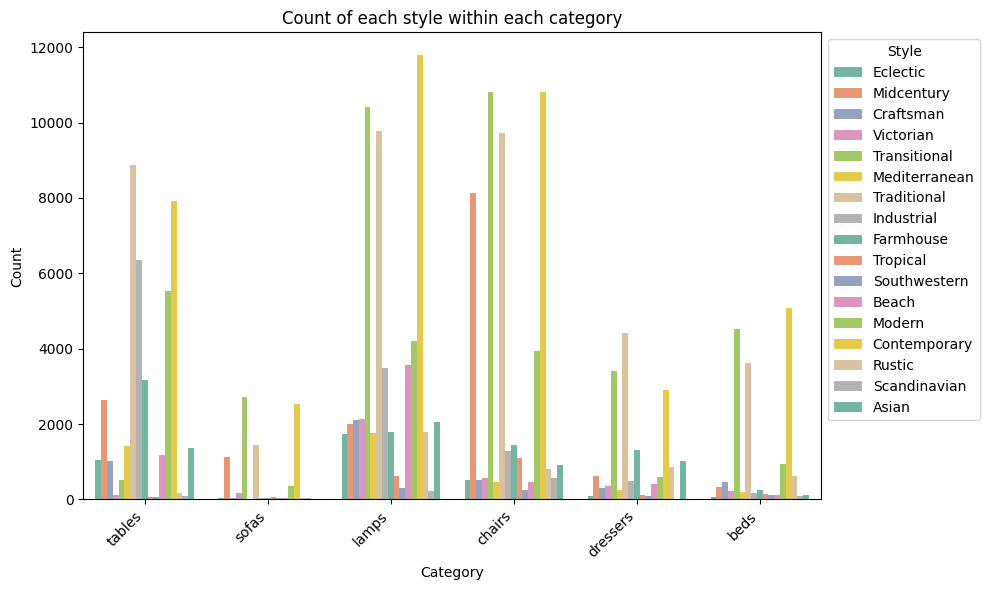

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_style_counts(df):
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Plotting
    sns.countplot(data=df, x='Category', hue='Style', palette='Set2')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Count of each style within each category')
    plt.legend(title='Style', bbox_to_anchor=(1, 1))  # Place legend outside the plot
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from being cut off
    plt.show()


plot_style_counts(df_1)

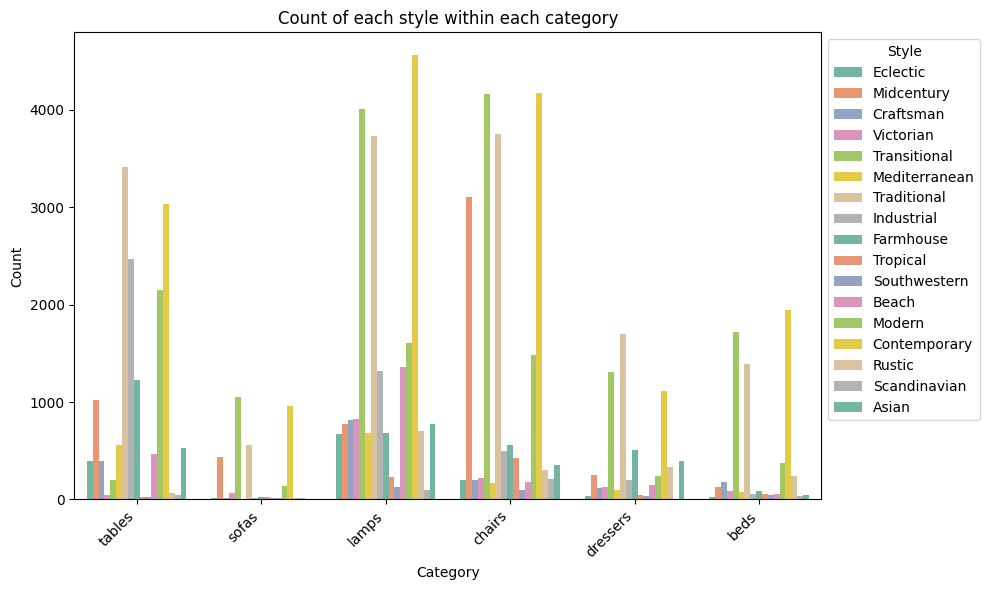

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_style_counts(df):
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Plotting
    sns.countplot(data=df, x='Category', hue='Style', palette='Set2')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Count of each style within each category')
    plt.legend(title='Style', bbox_to_anchor=(1, 1))  # Place legend outside the plot
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from being cut off
    plt.show()


plot_style_counts(df_2)

In [19]:
def oversample_styles(df):
    # Calculate the current counts of each style within each category
    current_counts = df.groupby(['Category', 'Style']).size().reset_index(name='Current_Count')

    # Calculate the average number of images across styles within each category
    avg_counts = current_counts.groupby('Category')['Current_Count'].mean().astype(int).reset_index(name='Avg_Count')

    # Calculate the max number of images across styles within each category
    max_counts = current_counts.groupby('Category')['Current_Count'].max().reset_index(name='Max_Count')

    # Merge the current counts with the average and max counts
    counts_merged = pd.merge(current_counts, avg_counts, on='Category')
    counts_merged = pd.merge(counts_merged, max_counts, on='Category')

    # Calculate the threshold as the sum of average and max
    counts_merged['Threshold'] = ((counts_merged['Avg_Count'] + counts_merged['Max_Count']))

    # Calculate the final counts based on the given rules
    counts_merged['Final_Count'] = counts_merged.apply(
        lambda row: max(row['Threshold'], int(row['Current_Count'] * 1.3)),
        axis=1
    )

    return counts_merged

oversampled_df_sample_1 = oversample_styles(df_1)
print(oversampled_df_sample_1)

    Category         Style  Current_Count  Avg_Count  Max_Count  Threshold  \
0       beds         Asian            128       1003       5078       6081   
1       beds         Beach            129       1003       5078       6081   
2       beds  Contemporary           5078       1003       5078       6081   
3       beds     Craftsman            472       1003       5078       6081   
4       beds      Eclectic             54       1003       5078       6081   
..       ...           ...            ...        ...        ...        ...   
97    tables  Southwestern             71       2444       8876      11320   
98    tables   Traditional           8876       2444       8876      11320   
99    tables  Transitional            506       2444       8876      11320   
100   tables      Tropical             64       2444       8876      11320   
101   tables     Victorian            126       2444       8876      11320   

     Final_Count  
0           6081  
1           6081  
2     

In [43]:
def oversample_styles(df):
    # Calculate the current counts of each style within each category
    current_counts = df.groupby(['Category', 'Style']).size().reset_index(name='Current_Count')

    # Calculate the average number of images across styles within each category
    avg_counts = current_counts.groupby('Category')['Current_Count'].mean().astype(int).reset_index(name='Avg_Count')

    # Calculate the max number of images across styles within each category
    max_counts = current_counts.groupby('Category')['Current_Count'].max().reset_index(name='Max_Count')

    # Merge the current counts with the average and max counts
    counts_merged = pd.merge(current_counts, avg_counts, on='Category')
    counts_merged = pd.merge(counts_merged, max_counts, on='Category')

    # Calculate the threshold as the sum of average and max
    counts_merged['Threshold'] = ((counts_merged['Avg_Count'] + counts_merged['Max_Count']))

    # Calculate the final counts based on the given rules
    counts_merged['Final_Count'] = counts_merged.apply(
        lambda row: max(row['Threshold'], int(row['Current_Count'] * 1.3)),
        axis=1
    )

    return counts_merged

oversampled_df_sample_2 = oversample_styles(df_2)
print(oversampled_df_sample_2)

    Category         Style  Current_Count  Avg_Count  Max_Count  Threshold  \
0       beds         Asian             48        384       1944       2328   
1       beds         Beach             51        384       1944       2328   
2       beds  Contemporary           1944        384       1944       2328   
3       beds     Craftsman            184        384       1944       2328   
4       beds      Eclectic             22        384       1944       2328   
..       ...           ...            ...        ...        ...        ...   
97    tables  Southwestern             27        945       3416       4361   
98    tables   Traditional           3416        945       3416       4361   
99    tables  Transitional            200        945       3416       4361   
100   tables      Tropical             24        945       3416       4361   
101   tables     Victorian             46        945       3416       4361   

     Final_Count  
0           2328  
1           2328  
2     

In [45]:
# Calculate and print the total sum of Final_Count
total_final_count = oversampled_df_sample_2['Final_Count'].sum()
print("Total Final Count:", total_final_count)

Total Final Count: 362677


### Augment for dataset 1

In [ ]:
styler.boxify("Augmenting images in the training set")

print("\n>>> Augmenting images in the training set... Please wait.\n")
# Augment images in the training set
for img_path in df_train["Path"]:
    # Check if img_path starts with "aug_"
    if os.path.basename(img_path).strip().startswith("aug_"):
        continue

    # Extract directory name
    directory = os.path.dirname(img_path)

    # Augment images in the directory
    df_train = leon.augment_image(
        image_path=img_path, output_dir=directory, df_train=df_train
    )

# Display the first few rows of the filtered DataFrame
df_train.head()

### Augment for dataset 2

In [ ]:
# Augment images in the training set
for index, row in df_2.iterrows():
    img_path = row["Path"]

    # Check if img_path starts with "aug_"
    if os.path.basename(img_path).strip().startswith("aug_"):
        continue

    print(f"Augmenting: {img_path}")

    # Extract directory name
    directory = os.path.dirname(img_path)

    # Get the corresponding oversampled count for the style
    style_oversampled_count = oversampled_df_sample_2[
        (oversampled_df_sample_2["Category"] == row["Category"])
        & (oversampled_df_sample_2["Style"] == row["Style"])
    ]["Final_Count"].iloc[0]

    # Count existing images in the directory for this style
    existing_images = df_2[(df_2["Category"] == row["Category"]) & (df_2["Style"] == row["Style"])]

    # Calculate the number of existing images
    num_existing_images = len(existing_images)

    # Calculate the number of additional augmentations needed
    num_images_to_generate = max(0, style_oversampled_count - num_existing_images)

    # Distribute additional augmentations evenly across existing images
    num_augmentations_per_image = num_images_to_generate // num_existing_images

    for _, existing_row in existing_images.iterrows():
        # Augment images in the directory based on the oversampled count
        df_2 = leon.augment_image(
            image_path=existing_row["Path"],
            output_dir=directory,
            df=df_2,
            num_images=num_augmentations_per_image,
        )

    # Augment remaining images if the distribution is uneven
    remaining_augmentations = num_images_to_generate % num_existing_images
    for _, existing_row in existing_images.head(remaining_augmentations).iterrows():
        df_2 = leon.augment_image(
            image_path=existing_row["Path"],
            output_dir=directory,
            df=df_2,
            num_images=1,  # Augment one more image
        )

## 5. Pixel Normalization

Normalization is a critical stage in preprocessing image data for deep learning applications. It ensures all pixel values fall within a consistent range, typically between `0` and `1`. This seemingly simple step offers several advantages:

- **Faster Convergence**: By reducing the overall value range, normalization accelerates the convergence of the optimization algorithm used to train the model.
- **Improved Stability**: Normalization creates a more stable training process, mitigating issues like vanishing and exploding gradients:

    - *Vanishing Gradients*: In deep learning, vanishing gradients occur when the gradients (slopes) of the loss function become very small as they propagate backward through the layers of a deep neural network. This can cause the model to learn very slowly or not at all.
    
    - *Exploding Gradients*: Conversely, exploding gradients happen when gradients become excessively large, causing the model to diverge (lose stability) during training.
- **Boosted Performance**: Consistent input data, achieved through normalization, often leads to better model performance and generalization on unseen data.

It's important to acknowledge that the normalization range is not restricted to `[0, 1]`. Other techniques, such as **Z-score normalization**, may be appropriate depending on the specific model and data characteristics. However, due to its simplicity and effectiveness, `[0, 1]` normalization remains a popular choice for preprocessing pipelines.

### Note: The Normalization Will Not Be Performed At This Stage

While the normalization process itself is successful, it is not recommended to save the **normalized images** to disk afterwards. This is due to a data type mismatch. The original images are stored in an unsigned 8-bit integer format (**uint8**), whereas the **normalized images** are in a single-precision floating-point format (**float32**). This conversion can lead to a loss of color information and a reduction in image sharpness.

Consequently, to avoid this issue, the normalization process will be performed during the **model training** phase. During training, the normalization will be applied dynamically to the input data, ensuring compatibility with the model's input requirements without compromising image quality.

# IV. Conclusion

Overall, data preprocessing is a crucial step in the machine learning pipeline. By applying the techniques outlined in this notebook, we have prepared our dataset for model training. The data is now **clean**, **labeled**, **split into training and testing sets**, **resized**, **augmented**, and **normalized**.

These preprocessing steps are essential for ensuring that the model can learn effectively from the data and make accurate predictions.

In [58]:
# Display info of the training set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196626 entries, 0 to 196625
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Path      196626 non-null  object 
 1   Category  196626 non-null  object 
 2   Style     196626 non-null  object 
 3   Width     196626 non-null  object 
 4   Height    196626 non-null  object 
 5   MinValue  196626 non-null  object 
 6   MaxValue  196626 non-null  object 
 7   StdDev    196626 non-null  float64
dtypes: float64(1), object(7)
memory usage: 12.0+ MB


In [59]:
# Display the first few rows of the filtered DataFrame
df_train.head(10)

,Path,Category,Style,Width,Height,MinValue,MaxValue,StdDev
0,..\..\data\raw\Furniture_Data\Furniture_Data\d...,dressers,Asian,256,256,0,255,78.264
1,..\..\data\raw\Furniture_Data\Furniture_Data\l...,lamps,Asian,256,256,0,255,56.407
2,..\..\data\raw\Furniture_Data\Furniture_Data\d...,dressers,Asian,256,256,0,255,69.653
3,..\..\data\raw\Furniture_Data\Furniture_Data\l...,lamps,Asian,256,256,5,255,84.765
4,..\..\data\raw\Furniture_Data\Furniture_Data\l...,lamps,Asian,256,256,2,255,56.765
5,..\..\data\raw\Furniture_Data\Furniture_Data\l...,lamps,Asian,256,256,0,255,52.500
6,..\..\data\raw\Furniture_Data\Furniture_Data\c...,chairs,Asian,256,256,0,255,93.022
7,..\..\data\raw\Furniture_Data\Furniture_Data\d...,dressers,Asian,256,256,0,255,91.396
8,..\..\data\raw\Furniture_Data\Furniture_Data\t...,tables,Asian,256,256,28,255,48.064
9,..\..\data\raw\Furniture_Data\Furniture_Data\c...,chairs,Asian,256,256,0,255,76.749


In [60]:
# Write train set to CSV
try:
    styler.boxify("Writing train set to CSV")
    df_train_2.to_csv("../../data_1/processed/train.csv", index=False)
    df_test_1.to_csv("../../data_1/test/test.csv", index=False)

    df_train_2.to_csv("../../data_2/processed/train.csv", index=False)
    df_test_2.to_csv("../../data_2/test/test.csv", index=False)
except Exception as e:
    print(e)

print (">>> Data saved successfully")

╭──────────────────────────╮
│ Writing train set to CSV │
╰──────────────────────────╯
>>> Data saved successfully
